# analysis

In [1]:
from ast import literal_eval

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [2]:
df_proc = pd.read_csv('../data/processed.csv')
df_pred = pd.read_csv('../data/scores_2022_1_28.csv', index_col=0)

df = df_proc.merge(df_pred, on='input_name', how='inner')

df

,input_name,igdb_id,steam_id,personal_rating,feat_rating,feat_popularity,feat_tags_meta_2d,feat_tags_meta_3d,feat_tags_meta_action,feat_tags_meta_adventure,...,feat_emb_text_759,feat_emb_text_760,feat_emb_text_761,feat_emb_text_762,feat_emb_text_763,feat_emb_text_764,feat_emb_text_765,feat_emb_text_766,feat_emb_text_767,predicted_rating
0,8Doors: Arum's Afterlife Adventure,137635.0,668550.0,NaN,79,0.18,1,0,1,1,...,-0.013590,-0.066271,0.049260,0.010090,0.003553,0.016597,0.020447,-0.014808,0.007623,3.985830
1,112 Operator,115270.0,793460.0,NaN,87,0.47,1,0,1,0,...,-0.037108,-0.029286,0.030592,-0.012486,-0.021407,-0.041149,-0.010692,0.063817,-0.031678,4.336489
2,140,9497.0,242820.0,NaN,94,0.41,1,0,1,0,...,0.012563,-0.077963,0.024912,-0.002723,0.014076,0.021067,0.035306,0.008275,-0.012206,4.727233
3,ADOM (Ancient Domains Of Mystery),36159.0,333300.0,NaN,89,0.32,1,0,0,1,...,-0.016336,-0.009888,0.033512,0.006399,0.013531,-0.004189,0.016228,0.011230,-0.003493,4.925317
4,AER Memories of Old,11560.0,331870.0,NaN,87,0.50,0,1,1,1,...,-0.024008,-0.026487,0.024519,0.016934,0.032883,0.009610,-0.001042,0.011012,-0.009780,4.043924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,嗜血印 Bloody Spell,123689.0,992300.0,NaN,87,0.77,0,1,1,1,...,-0.000095,-0.007884,0.029332,-0.000791,-0.032388,0.016033,0.010389,0.020766,-0.011630,4.284502
2548,Milk outside a bag of milk outside a bag of milk,159720.0,1604000.0,NaN,97,0.43,1,0,0,0,...,0.016022,-0.033718,-0.007664,0.020076,-0.006924,0.029066,-0.007762,0.007363,0.006256,4.736678
2549,Chorus,133305.0,1153640.0,NaN,86,0.29,0,0,1,1,...,0.003538,-0.014890,0.011087,0.006023,-0.021185,0.015547,0.014360,-0.021826,-0.002995,4.266069
2550,Call of Duty®: Black Ops III,9509.0,311210.0,NaN,82,0.90,0,0,1,1,...,0.052574,-0.018422,-0.005817,0.018549,-0.010037,-0.016373,-0.014782,-0.011565,0.018483,4.434689


In [3]:
df_pred.head(25)

,input_name,predicted_rating
568,Resident Evil 0,5.970137
507,BioShock Infinite,5.903143
697,Unbound: Worlds Apart,5.809228
390,Skyrim High Resolution Texture Pack,5.786695
773,Ori and the Will of the Wisps,5.756511
556,The Elder Scrolls® Online,5.756240
578,Dragon's Dogma: Dark Arisen,5.698898
793,Baldur's Gate 3,5.691192
620,Half-Life: Alyx,5.662067
2757,Supraland Six Inches Under,5.616098


In [4]:
### Regression Analysis

cols = [col for col in df.columns if 'feat' in col]
X = df[cols]
y = df['predicted_rating']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

w_p = [(name, weight, pvalue) for (name, weight), (_, pvalue) in zip(results.params.items(), results.pvalues.items())]
w_p_sorted = sorted(w_p, key=lambda x: x[2])

#results.summary()

In [5]:
for col, weight, pvalue in w_p_sorted:
    if pvalue <= 0.05:
        print(f'{col}: {weight}, {pvalue}')

feat_rating: 0.016654443086056278, 5.760707964723281e-27
feat_tags_meta_roguelike_simulation: -1.3505924287369093, 0.0007368024166888174
feat_tags_meta_simulation_roguelike: -1.3458583087339195, 0.0007769366486131016
feat_tags_meta_robots_soundtrack: 1.5520745692988251, 0.0021291779802403233
feat_tags_meta_simulation_casual: -0.6490738556340181, 0.0033890578324453197
feat_tags_meta_robots_atmospheric: -1.4620134750200793, 0.003595899128578142
feat_tags_meta_simulation_magic: -0.8109147128909202, 0.0072950544491887604
feat_tags_meta_roguelike_rpg: 0.7770350670669671, 0.007433380790042755
feat_tags_meta_rpg_roguelike: 0.7767225829184737, 0.007459325859018908
feat_tags_meta_sandbox_indie: 0.47689072548202693, 0.009084862520249457
feat_tags_meta_scifi_party: -0.33308453082801215, 0.010511239940623201
feat_tags_meta_roguelike_turn_based: -1.2101783870150198, 0.011434646068525792
feat_tags_meta_retro_casual: 0.5580596624827554, 0.023007093223330076
feat_tags_meta_roguelike_sword: -1.56516172

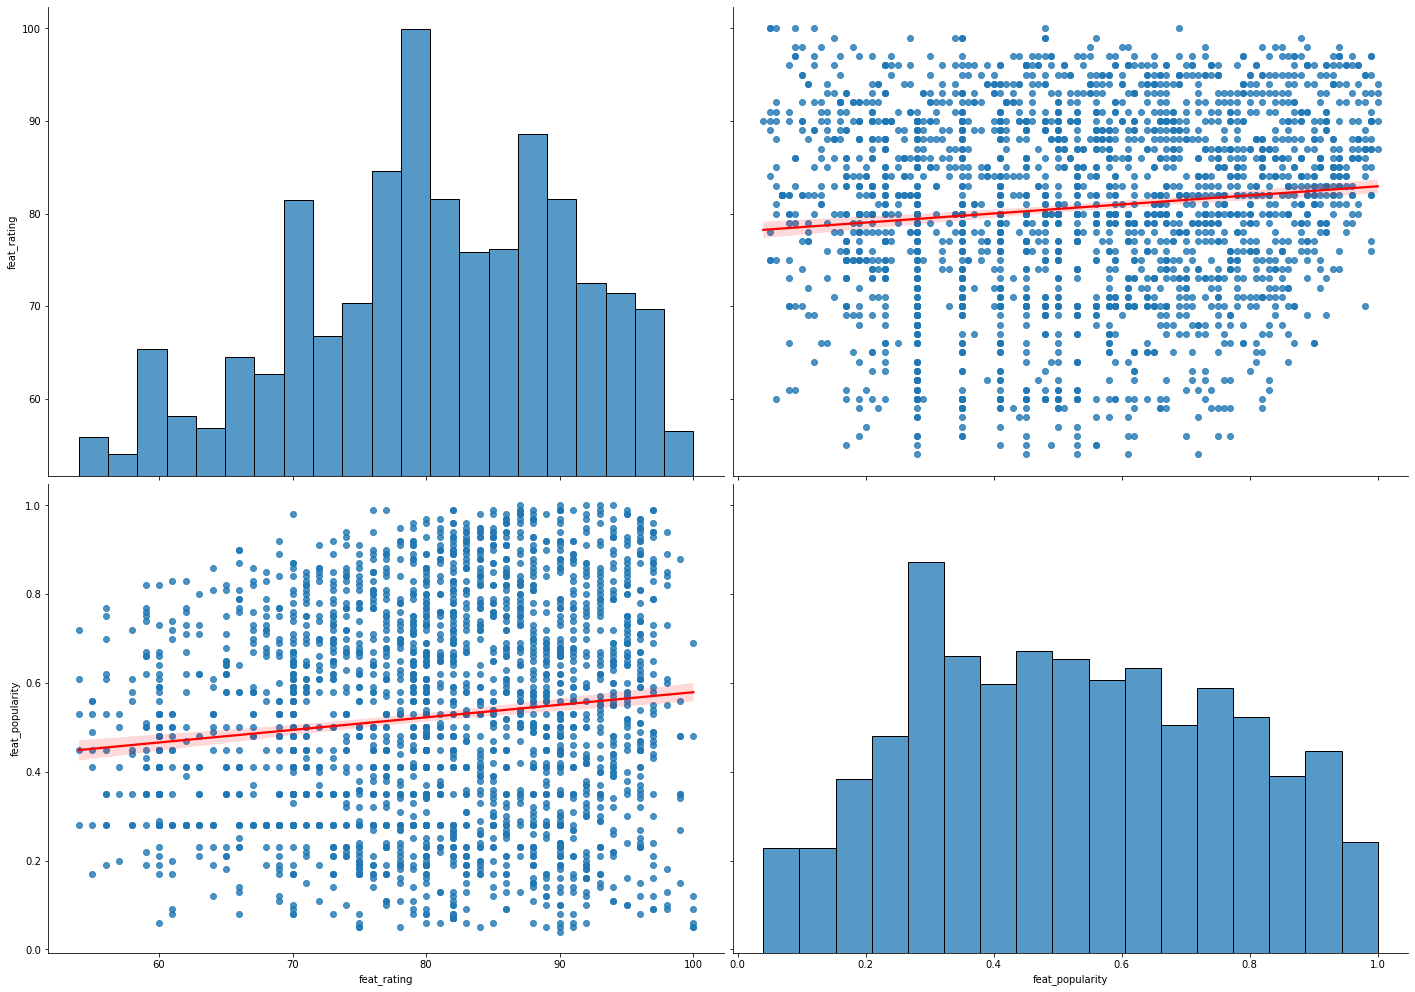

In [6]:
df_chart = df[['feat_rating', 'feat_popularity']]

df_chart = df_chart[np.abs(df_chart-df_chart.mean()) <= (2*df_chart.std())]

sns.pairplot(df_chart, kind="reg", plot_kws={'line_kws':{'color':'red'}}, height=7, aspect=10/7)

In [7]:
### SHAP

import scipy.stats as stats
import shap
from xgboost import XGBRegressor

cols = [col for col in df.columns if 'feat' in col]
X = df[cols]
y = df['predicted_rating']

model = XGBRegressor()
model.fit(X, y)
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
df_shap = pd.DataFrame(shap_values.values, columns=X.columns)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [8]:
df_shap = pd.DataFrame(shap_values.values, columns=X.columns)

for col, imp in df_shap.abs().mean().sort_values(ascending=False)[:10].items():
    print(f'{col}: {imp:0.3f}')

feat_rating: 0.177
feat_tags_meta_action_fantasy: 0.020
feat_tags_meta_fantasy: 0.019
feat_tags_meta_action_coop: 0.014
feat_tags_meta_adventure_simulation: 0.014
feat_tags_meta_atmospheric_strategy: 0.012
feat_tags_meta_action_indie: 0.012
feat_tags_meta_action: 0.011
feat_emb_text_378: 0.011
feat_tags_meta_anime: 0.011


In [9]:
corrs = []
for col in X.columns:
    corr, _ = stats.spearmanr(df[col], df_shap[col])
    corr = corr if not np.isnan(corr) else 0
    corrs.append((col, corr))

c_i = [(col, corr, df_shap[col].abs().mean()) for col, corr in corrs if 'text' not in col]
c_i = sorted(c_i, key=lambda x: x[1]*x[2], reverse=True)


An input array is constant; the correlation coefficient is not defined.


In [10]:
for col, corr, shap_imp in c_i[:25]:
    print(f'{col}: {corr:0.3f}//{shap_imp:0.3f}')

feat_rating: 0.915//0.177
feat_tags_meta_fantasy: 0.761//0.019
feat_tags_meta_action_fantasy: 0.683//0.020
feat_tags_meta_action: 0.811//0.011
feat_tags_meta_fantasy_rpg: 0.546//0.008
feat_tags_meta_horror_shooter: 0.310//0.004
feat_tags_meta_rpg: 0.773//0.002
feat_tags_meta_horror_soundtrack: 0.338//0.002
feat_tags_meta_magic_sword: 0.285//0.002
feat_tags_meta_action_shooter: 0.677//0.001
feat_tags_meta_atmospheric_exploration: 0.373//0.001
feat_tags_meta_rpg_sword: 0.387//0.001
feat_tags_meta_rpg_tactical: 0.330//0.001
feat_tags_meta_horror_puzzle: 0.226//0.001
feat_tags_meta_fantasy_third_person: 0.293//0.001
feat_tags_meta_historical_medieval: 0.299//0.001
feat_tags_meta_sandbox: 0.519//0.000
feat_tags_meta_atmospheric_horror: 0.343//0.000
feat_tags_meta_2d_atmospheric: 0.205//0.000
feat_tags_meta_building_rpg: 0.273//0.000
feat_tags_meta_strategy_sword: 0.265//0.000
feat_tags_meta_action_racing: 0.321//0.000
feat_tags_meta_open_world_sandbox: 0.412//0.000
feat_tags_meta_atmospheri

In [11]:
# Bottom 25
for col, corr, shap_imp in c_i[-10:]:
    print(f'{col}: {corr:0.3f}//{shap_imp:0.3f}')

feat_tags_meta_adventure_retro: -0.405//0.009
feat_tags_meta_adventure: -0.843//0.005
feat_tags_meta_atmospheric_strategy: -0.313//0.012
feat_tags_meta_adventure_anime: -0.390//0.010
feat_tags_meta_adventure_building: -0.484//0.010
feat_tags_meta_anime: -0.522//0.011
feat_tags_meta_adventure_simulation: -0.451//0.014
feat_tags_meta_action_coop: -0.512//0.014
feat_tags_meta_indie: -0.706//0.011
feat_tags_meta_action_indie: -0.640//0.012


In [12]:
for col, corr, mag in c_i:
    if 'action' in col and corr*mag != 0:
        print(f'{col}: {corr:0.3f}//{mag:0.3f}')

feat_tags_meta_action_fantasy: 0.683//0.020
feat_tags_meta_action: 0.811//0.011
feat_tags_meta_action_shooter: 0.677//0.001
feat_tags_meta_action_racing: 0.321//0.000
feat_tags_meta_action_arcade: 0.241//0.000
feat_tags_meta_action_soundtrack: 0.600//0.000
feat_tags_meta_action_historical: -0.435//0.000
feat_tags_meta_action_horror: -0.482//0.000
feat_tags_meta_action_fighting: -0.455//0.000
feat_tags_meta_action_hack_and_slash: -0.506//0.000
feat_tags_meta_action_scifi: -0.725//0.000
feat_tags_meta_2d_action: -0.465//0.000
feat_tags_meta_action_difficult: -0.408//0.000
feat_tags_meta_action_anime: -0.246//0.001
feat_tags_meta_action_sandbox: -0.374//0.001
feat_tags_meta_action_robots: -0.331//0.002
feat_tags_meta_action_simulation: -0.479//0.003
feat_tags_meta_action_rpg: -0.710//0.004
feat_tags_meta_action_coop: -0.512//0.014
feat_tags_meta_action_indie: -0.640//0.012


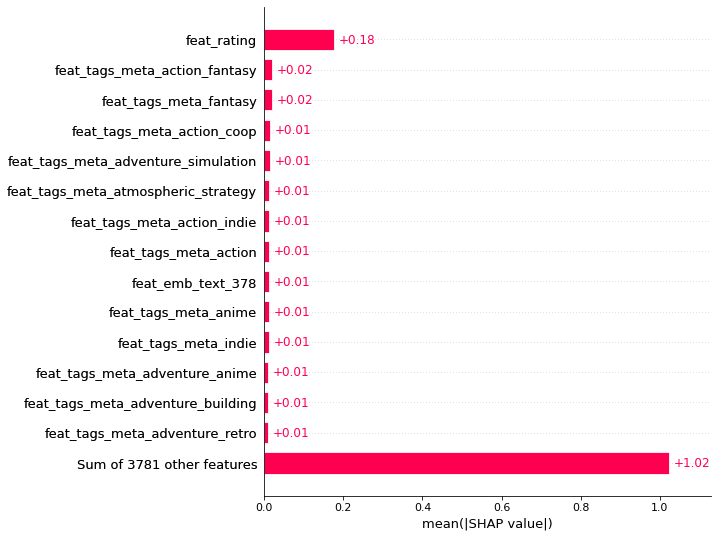

In [13]:
shap.plots.bar(shap_values, max_display=15)

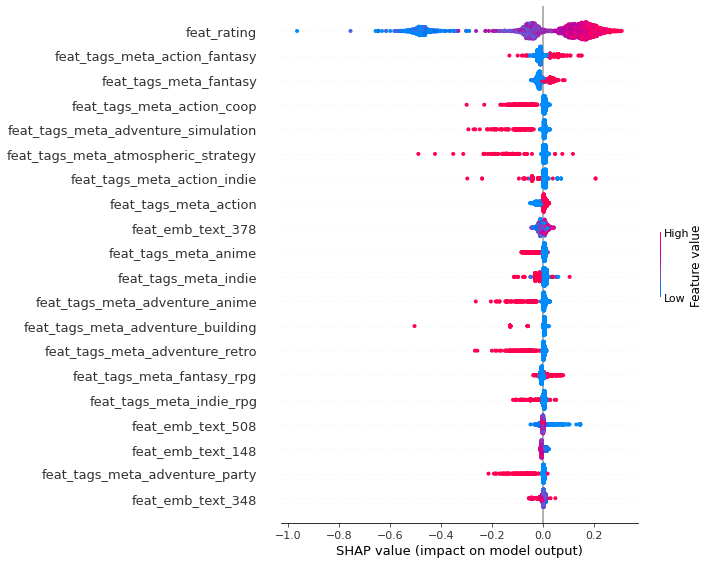

In [14]:
shap.summary_plot(shap_values, X)

In [15]:
idx = df[df['input_name'] == 'HUMANKIND™'].index[0]
shap.plots.waterfall(shap_values[idx], max_display=15)

IndexError: index 0 is out of bounds for axis 0 with size 0

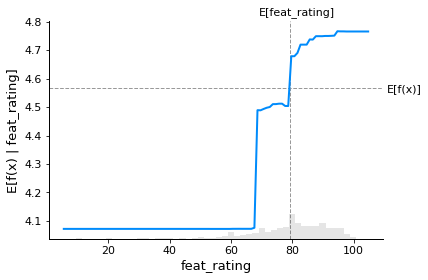

In [16]:
fig,ax = shap.partial_dependence_plot(
    "feat_rating", model.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
)

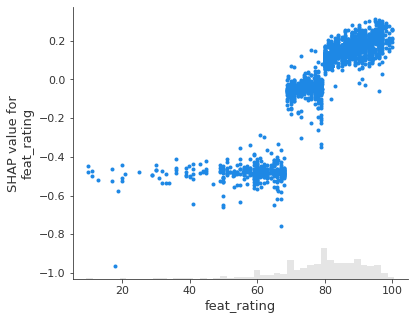

In [17]:
shap.plots.scatter(shap_values[:,"feat_rating"])

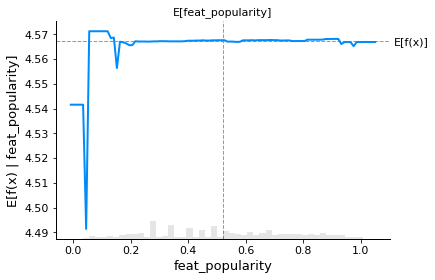

In [18]:
fig,ax = shap.partial_dependence_plot(
    "feat_popularity", model.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

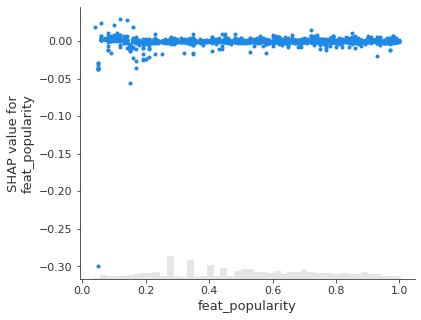

In [19]:
shap.plots.scatter(shap_values[:,"feat_popularity"])

# Insights From SHAP
- Rating is overwhelmingly the most important feature. Generally above 80% means like and below 80% means dislike
- Like Fantasy games
- Like Adventure games
- Like Atmospheric games
- I like most action games, except I dislike action games that overly strive for realism (I suspect it is because they sacrifice "fun" to make it more accurate)
- I like scary shooters (I'd guess this is just learning that I like resident evil games)
- Dislike most Strategy games except when they are tactical turn-based games like Gears Tactics.
- Dislike Sandbox games
- Dislike Simulation games